In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
!pip3 install scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


## First look at the data

In [4]:
flat_data = pd.read_csv('/Users/gorka.bengochea/Desktop/dataset_nuevo/listings.csv')

In [5]:
print('train: {}'.format(flat_data.shape))
flat_data.head()

train: (21495, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Simon,Chamartín,Hispanoamérica,40.45628,-3.67763,Private room,70,1,73,2019-12-13,0.61,1,82
1,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40341,-3.74084,Private room,17,4,33,2018-07-15,0.52,2,162
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Jesus,Arganzuela,Legazpi,40.38695,-3.69304,Entire home/apt,50,15,0,NaN,NaN,6,213
3,24805,Gran Via Studio Madrid,101471,Iraido,Centro,Universidad,40.42202,-3.70395,Entire home/apt,80,5,9,2020-01-03,0.14,1,362
4,24836,"Select the Madrid more ""cool"".",101653,Tenty,Centro,Justicia,40.41995,-3.69764,Entire home/apt,115,3,67,2019-12-08,0.64,1,342


In [6]:
print('train: {}'.format(flat_data.shape))
flat_data.head()

train: (21495, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Simon,Chamartín,Hispanoamérica,40.45628,-3.67763,Private room,70,1,73,2019-12-13,0.61,1,82
1,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40341,-3.74084,Private room,17,4,33,2018-07-15,0.52,2,162
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Jesus,Arganzuela,Legazpi,40.38695,-3.69304,Entire home/apt,50,15,0,NaN,NaN,6,213
3,24805,Gran Via Studio Madrid,101471,Iraido,Centro,Universidad,40.42202,-3.70395,Entire home/apt,80,5,9,2020-01-03,0.14,1,362
4,24836,"Select the Madrid more ""cool"".",101653,Tenty,Centro,Justicia,40.41995,-3.69764,Entire home/apt,115,3,67,2019-12-08,0.64,1,342


In [7]:
flat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21495 entries, 0 to 21494
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              21495 non-null  int64  
 1   name                            21492 non-null  object 
 2   host_id                         21495 non-null  int64  
 3   host_name                       21470 non-null  object 
 4   neighbourhood_group             21495 non-null  object 
 5   neighbourhood                   21495 non-null  object 
 6   latitude                        21495 non-null  float64
 7   longitude                       21495 non-null  float64
 8   room_type                       21495 non-null  object 
 9   price                           21495 non-null  int64  
 10  minimum_nights                  21495 non-null  int64  
 11  number_of_reviews               21495 non-null  int64  
 12  last_review                     

Looks like 'name' and 'host_name', 'host_id' don't useful feature for rent price. 
Latitude and longitude look interesting, but I think they should show the same as neighbourhood. 

In [8]:
#missing values for columns

is_null_data = flat_data.isnull()
total = is_null_data.sum()
percent = ((total/is_null_data.count())*100)
missing_data = pd.concat([total, percent], axis=1, keys=['Total Missing', 'Percent'])
missing_data = missing_data[missing_data['Total Missing'] > 0]
    
missing_data.sort_values(by='Percent', ascending=False)

,Total Missing,Percent
last_review,4291,19.962782
reviews_per_month,4291,19.962782
host_name,25,0.116306
name,3,0.013957


The number of missing values is small, but the last two columns I plan to drop. 

### Statistics and outliers

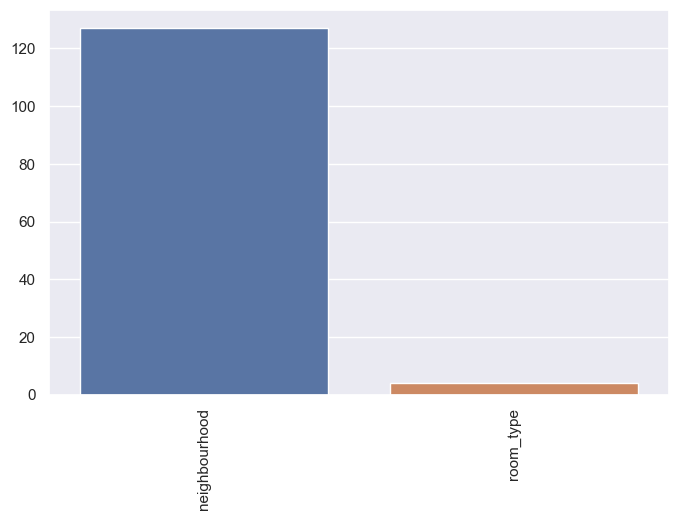

In [9]:
sns.set()
plt.figure(figsize=(8,5))

#visualize number of unique atributer for each categorical feature
count_uniq = []
columns = ['neighbourhood', 'room_type']
for column in columns:
    count_uniq.append(flat_data[column].nunique())
    
sns.barplot(x=columns, y=count_uniq)
plt.xticks(rotation='vertical');

There are a lot of values for neighbourhood area. 
It may sense to try Frequency Encoding for it. </br>
up: FE was removed from code as I removed neighbourhood column.

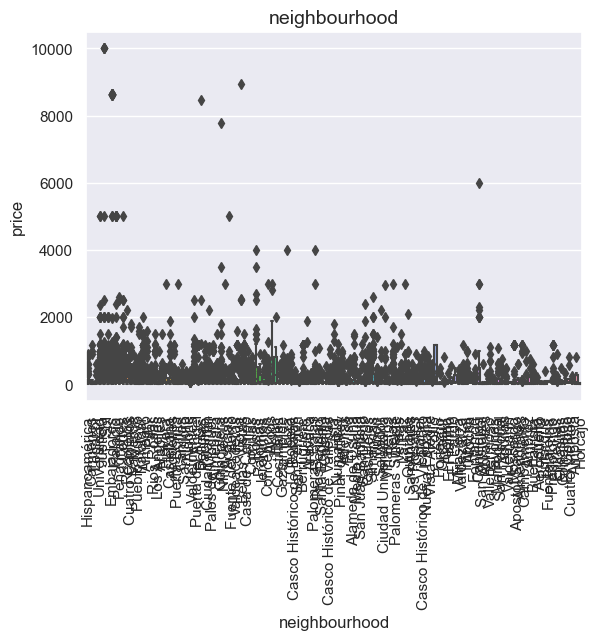

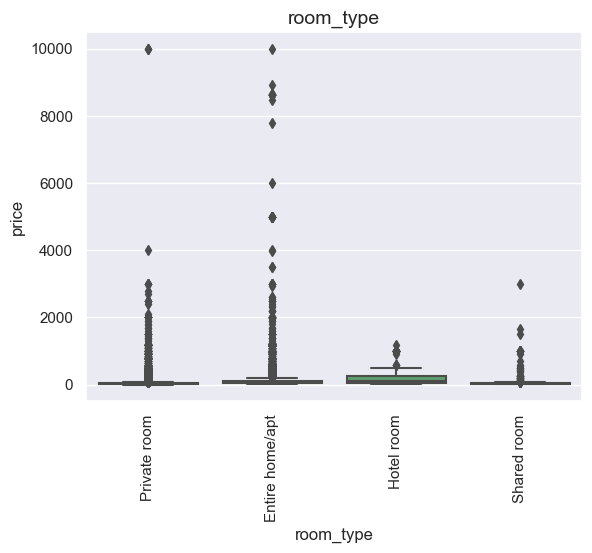

In [10]:
#outliers for categorical features
for col in columns:
    sns.boxplot(x=flat_data[col], y=flat_data.price)
    plt.ylabel("price", fontsize=12)
    plt.xticks(rotation='vertical')
    plt.title(col, fontsize=14)
    plt.show()

We have a more expensive and cheaper area what is ok.
Also, some room type should be more expansive than others, for example, Entire home sounds better than a private room, but the price for a room looks some time higher.

In [15]:
flat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21495 entries, 0 to 21494
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              21495 non-null  int64  
 1   name                            21492 non-null  object 
 2   host_id                         21495 non-null  int64  
 3   host_name                       21470 non-null  object 
 4   neighbourhood_group             21495 non-null  object 
 5   neighbourhood                   21495 non-null  object 
 6   latitude                        21495 non-null  float64
 7   longitude                       21495 non-null  float64
 8   room_type                       21495 non-null  object 
 9   price                           21495 non-null  int64  
 10  minimum_nights                  21495 non-null  int64  
 11  number_of_reviews               21495 non-null  int64  
 12  last_review                     

In [14]:
#stats for categorical features
for col in columns:
    flat_data[col] = flat_data[col].astype(str)
    sns.countplot(flat_data[col])
    plt.xticks(rotation='vertical')
    plt.title(col, fontsize=14)
    plt.show()


ValueError: could not convert string to float: 'Hispanoamérica'

In [13]:
#stats for categorical features
for col in columns:
    flat_data[col] = flat_data[col].fillna('Missing')  # Fill missing values with a string
    flat_data[col] = flat_data[col].astype(str)
    sns.countplot(flat_data[col])
    plt.xticks(rotation='vertical')
    plt.title(col, fontsize=14)
    plt.show()


ValueError: could not convert string to float: 'Hispanoamérica'

Maybe make sense to reduce the number of areas.
It would be better for Random Forest Regressor model as it could not work with such amount of values. 
up: combined neighbourhoods did not improve the result.

In [21]:
#outliers for numerical features
numerical_columns = flat_data.select_dtypes(exclude=['object']).columns[2:-1]
for col in numerical_columns:
    sns.scatterplot(flat_data[col], flat_data.price)
    plt.title(col, fontsize=14)
    plt.show()

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

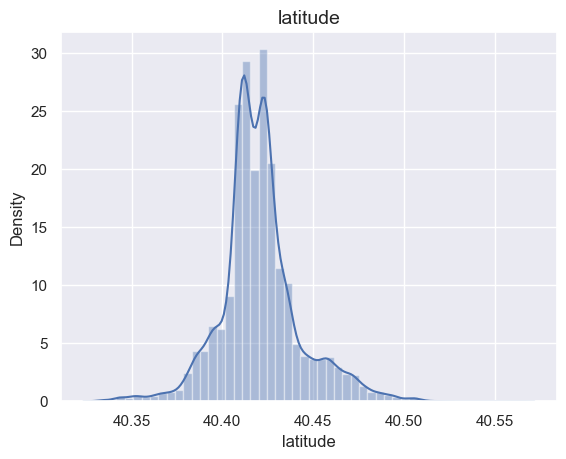

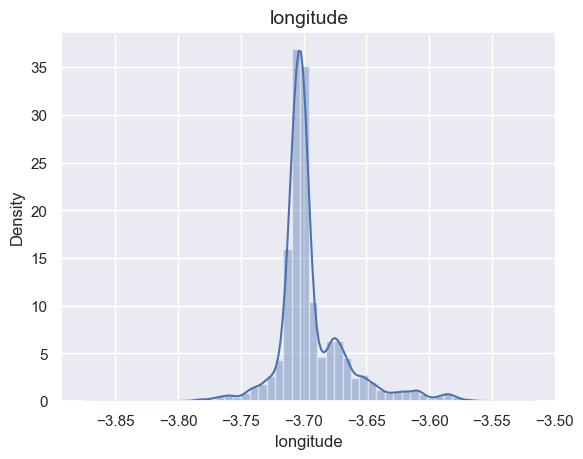

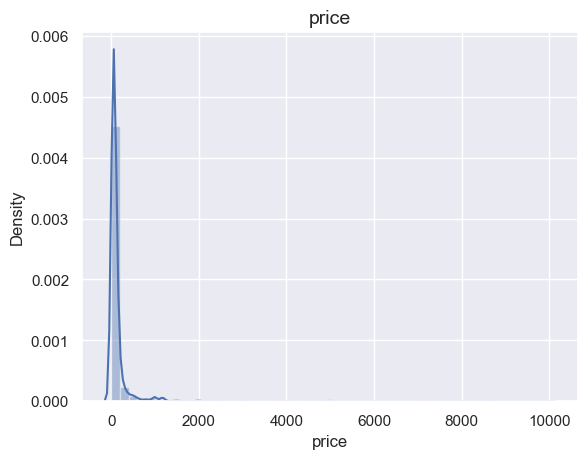

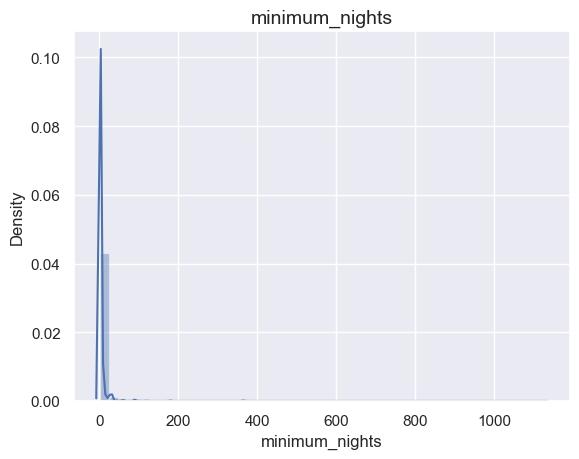

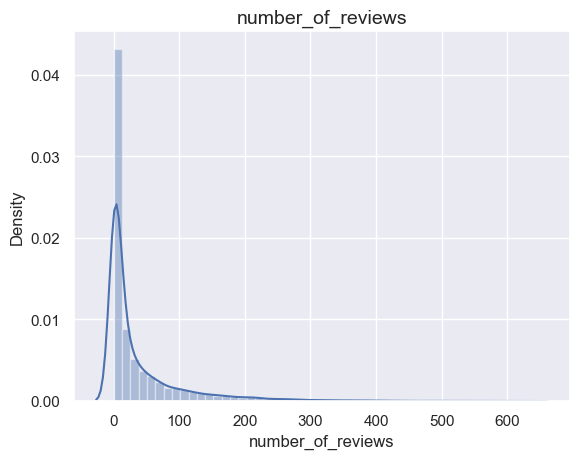

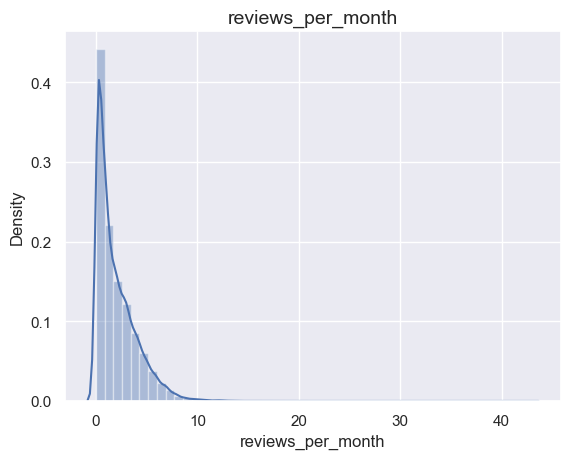

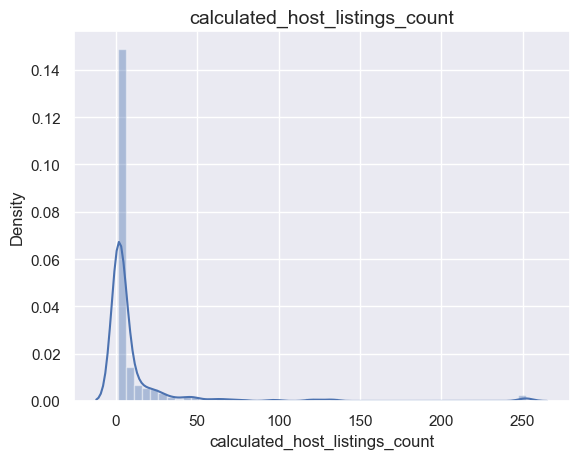

In [22]:
#distribution for numerical features
for col in numerical_columns:
    sns.distplot(flat_data[col])
    plt.title(col, fontsize=14)
    plt.show()

#### Let's look are there a correlation between neighbourhood and price?

In [23]:
# Visualization by area and price.
plt.figure(figsize=(14,10))
sns.scatterplot(flat_data['longitude'], flat_data['latitude'],
                size=flat_data['price'],
                hue=flat_data['neighbourhood'], legend=False);

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 3 keyword-only arguments) were given

<Figure size 1400x1000 with 0 Axes>

In [24]:
#visualization for price 
plt.figure(figsize=(14,10))
sns.scatterplot(flat_data['longitude'], flat_data['latitude'],
                hue=flat_data['price']);

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

<Figure size 1400x1000 with 0 Axes>

There are just a few points with price bigger than average.

In [18]:
flat_grp = flat_data[['neighbourhood', 'price']].groupby('neighbourhood', as_index=False).median()\
        .sort_values(by='price')

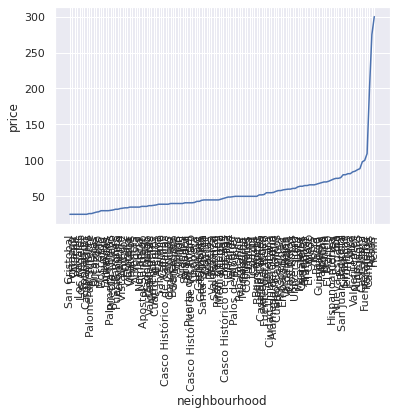

In [19]:
sns.lineplot(flat_grp['neighbourhood'], flat_grp['price'])
plt.xticks(rotation='vertical');

There are strong correlation between price and neighbourhood area.

#### Let's look are there a correlation between reviews and price?

In [20]:
flat_data['last_review'] = pd.to_datetime(flat_data['last_review'])

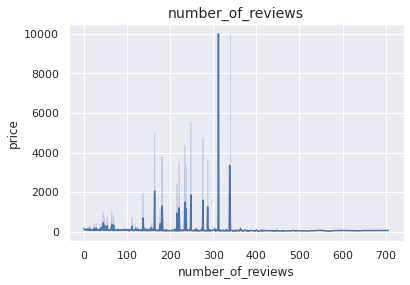

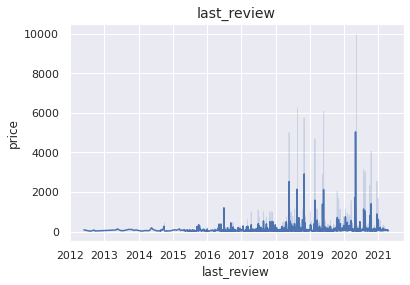

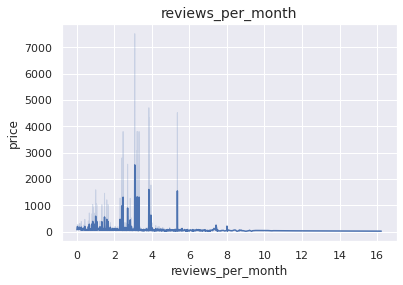

In [21]:
rewiev_data = flat_data[['number_of_reviews', 'last_review', 'reviews_per_month', 'price']]

for col in rewiev_data.columns[:-1]:
    sns.lineplot(flat_data[col], flat_data.price)
    plt.title(col, fontsize=14)
    plt.show()

I don't see a strong correlation between price and reviews. 

#### Why Host id is important feature?

In [22]:
#number of flats for each host
numb_host_flats = flat_data['host_id'].value_counts()

In [23]:
grp_host = flat_data.groupby('host_id').agg(
    num_of_flats=('name', 'count'), 
    mean_price=('price', 'mean')).sort_values('num_of_flats', ascending=False)

grp_host.head()

,num_of_flats,mean_price
host_id,,
377605855,163,123.625767
28038703,113,218.398230
102196656,101,84.742574
276565844,101,71.594059
32046323,92,189.706522


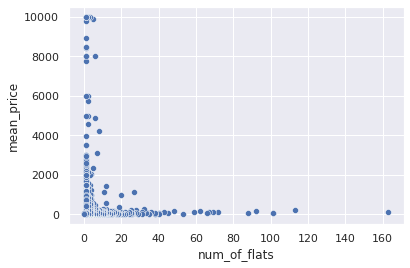

In [24]:
sns.scatterplot(grp_host['num_of_flats'], grp_host['mean_price']);

it looks like the more flats a host has - the less price.
So there is an influence.

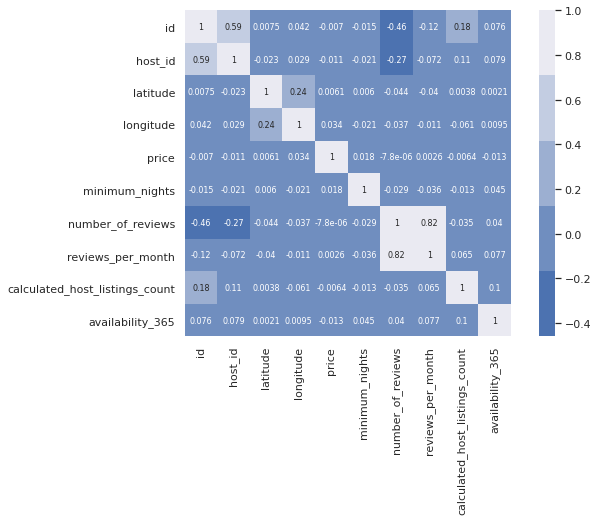

In [25]:
#numerical feature correlation with price
plt.figure(figsize=(10, 6))
sns.heatmap(flat_data.corr(), cbar=True, annot=True, square=True, annot_kws={'size': 8}, 
            cmap=["#4C72B0", "#708EBF", "#9CAFD1", "#C3CDE2", "#EAEAF2"]);

I don't found a strong linear correlation with target variable, so I think it is good idea to try Random Forest Regression.

## Data preprocessing

In [26]:
#remove columns not releted to accomodations directly and neighbourhood as we have lat and lon
flat_data = flat_data.drop(['id', 'host_name', 'name', 'last_review', 'neighbourhood'], axis=1)

In [27]:
#fill missing reviews with 0
flat_data = flat_data.fillna(0)

In [28]:
#seraching for outliers in one columns and back dataset without rows with outliers. Quantiles method here
def outliers_searche(df):
    q_25 = np.quantile(df, 0.25)
    q_75 = np.quantile(df, 0.75)
    x_min = q_25 - (q_75 - q_25) * 1.5
    x_max = q_75 + (q_75 - q_25) * 1.5    
    return df[(df <= x_min) | (df >= x_max)]

In [29]:
flat_data.drop(outliers_searche(flat_data['price']).index,inplace=True)

We have only one object column on this step and this column has just 4 values, so we can go with dummies for it. 

In [30]:
flat_data = pd.get_dummies(flat_data)

In [31]:
flat_data.head()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Arganzuela,...,neighbourhood_group_San Blas - Canillejas,neighbourhood_group_Tetuán,neighbourhood_group_Usera,neighbourhood_group_Vicálvaro,neighbourhood_group_Villa de Vallecas,neighbourhood_group_Villaverde,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,13660,40.45724,-3.67688,60,1,78,0.58,1,180,0,...,0,0,0,0,0,0,0,0,1,0
1,83531,40.40381,-3.74130,31,4,33,0.42,2,364,0,...,0,0,0,0,0,0,0,0,1,0
2,82175,40.38840,-3.69511,50,15,0,0.00,7,1,1,...,0,0,0,0,0,0,1,0,0,0
3,346366726,40.42183,-3.70529,92,5,10,0.13,1,72,0,...,0,0,0,0,0,0,1,0,0,0
4,114340,40.38975,-3.69018,26,2,149,1.12,1,365,1,...,0,0,0,0,0,0,0,0,1,0


## Model

I choose RN because it is robust to outliers and don't need Normal distribution.

In [32]:
X = flat_data.drop('price', axis=1)
y = flat_data['price']

In [33]:
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=1/3, random_state=0)

In [34]:
model = RandomForestRegressor()

In [35]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [36]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 20)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 150, num = 11)]
min_samples_split = [2, 5, 10, 20]
min_samples_leaf = [1, 2, 4, 10, 20]
bootstrap = [True, False]

parametrs = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [37]:
rnd_search_cv = RandomizedSearchCV(model, parametrs, cv=5)

In [38]:
rnd_search_cv.fit(xTrain, yTrain)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 24, 38, 52, 66, 80,
                                                      94, 108, 122, 136, 150],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 10, 20],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'n_estimators': [100, 147, 194, 242,
                                                         289, 336, 384, 431,
                                                         478, 526, 573, 621,
                                                         668, 715, 763, 810,
                                                         857, 905, 952, 1000]})

In [39]:
predictions = rnd_search_cv.best_estimator_.predict(xTest)

In [40]:
#Mean Absolute Error 
print('MAE:', metrics.mean_absolute_error(yTest, predictions))

#Mean Squared Error
print('MSE:', metrics.mean_squared_error(yTest, predictions))

#Root Mean Squared Error
print('RMSE:', np.sqrt(metrics.mean_squared_error(yTest, predictions)))

#R2
print('R2:', metrics.r2_score(yTest, predictions))

MAE: 20.01573543034576
MSE: 800.2300681649125
RMSE: 28.28833802408534
R2: 0.4921599037384716


## Feature importance

In [41]:
pd.Series(rnd_search_cv.best_estimator_.feature_importances_, index=X.columns).sort_values(ascending=False)

room_type_Entire home/apt                    0.312050
latitude                                     0.124631
host_id                                      0.113757
longitude                                    0.106703
reviews_per_month                            0.079818
calculated_host_listings_count               0.070912
availability_365                             0.069257
minimum_nights                               0.043719
number_of_reviews                            0.039525
room_type_Hotel room                         0.009998
neighbourhood_group_Centro                   0.004163
neighbourhood_group_Salamanca                0.003862
neighbourhood_group_Chamberí                 0.003404
neighbourhood_group_Arganzuela               0.001906
neighbourhood_group_Ciudad Lineal            0.001543
neighbourhood_group_Puente de Vallecas       0.001522
neighbourhood_group_Tetuán                   0.001420
room_type_Shared room                        0.001415
room_type_Private room      